<a href="https://colab.research.google.com/github/ManojKumarTiwari/Tensorflow2AndKeras/blob/master/ann_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import

In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.2.0
2.3.0-tf


In [0]:
# Dataset
from tensorflow.keras.datasets import fashion_mnist

# Model
from tensorflow.keras import Sequential
# Layer
from tensorflow.keras.layers import Dense, Flatten, Dropout
# Activation
from tensorflow.keras.activations import relu, softmax
# Optimization
from tensorflow.keras.optimizers import Adam
# Loss
from tensorflow.keras.losses import sparse_categorical_crossentropy
# Metric
from tensorflow.keras.metrics import sparse_categorical_accuracy

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load the data

In [6]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
X_train.shape, y_train.shape, X_test.shape, y_train.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (60000,))

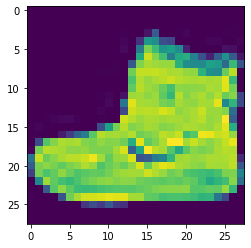

In [8]:
plt.imshow(X_train[0])

In [9]:
y_train[0]

9

In [10]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [11]:
X_train.max()

255

In [12]:
X_test.max()

255

In [13]:
X_train[0].shape

(28, 28)

In [0]:
X_train = X_train/255.0
X_test = X_test/255.0

# build an ann
- there are different syntaxs with which you can create models in Tensorflow

In [0]:
# 1st way
model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(300,relu))
model.add(Dense(100,relu))
model.add(Dense(10, softmax))

In [0]:
# 2nd way
model1 = Sequential([
                    Flatten(input_shape=[28,28]),
                    Dense(300, relu),
                    Dense(100, relu),
                    Dense(10, softmax)
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


# compile the model

In [0]:
model.compile(optimizer='adam', loss=sparse_categorical_crossentropy, metrics=[sparse_categorical_accuracy])

# train the model

In [19]:
history = model.fit(X_train, y_train, batch_size=30, validation_split=0.2, epochs=10)

Epoch 1/10
1600/1600 [==============================] - 6s 3ms/step - loss: 0.4947 - sparse_categorical_accuracy: 0.8221 - val_loss: 0.4070 - val_sparse_categorical_accuracy: 0.8528
Epoch 2/10
1600/1600 [==============================] - 6s 3ms/step - loss: 0.3728 - sparse_categorical_accuracy: 0.8627 - val_loss: 0.3995 - val_sparse_categorical_accuracy: 0.8572
Epoch 3/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.3304 - sparse_categorical_accuracy: 0.8779 - val_loss: 0.3675 - val_sparse_categorical_accuracy: 0.8637
Epoch 4/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.3093 - sparse_categorical_accuracy: 0.8845 - val_loss: 0.3438 - val_sparse_categorical_accuracy: 0.8750
Epoch 5/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.2901 - sparse_categorical_accuracy: 0.8909 - val_loss: 0.3858 - val_sparse_categorical_accuracy: 0.8651
Epoch 6/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.2731 - spars

In [20]:
history.history

{'loss': [0.4946703016757965,
  0.3728408217430115,
  0.3304460346698761,
  0.3093259334564209,
  0.29007232189178467,
  0.2730553150177002,
  0.2597871422767639,
  0.24974222481250763,
  0.23744606971740723,
  0.23063477873802185],
 'sparse_categorical_accuracy': [0.8221041560173035,
  0.8626875281333923,
  0.8778749704360962,
  0.8845416903495789,
  0.8908958435058594,
  0.8962291479110718,
  0.9027083516120911,
  0.9039999842643738,
  0.9097708463668823,
  0.9112708568572998],
 'val_loss': [0.4070410132408142,
  0.3994710147380829,
  0.3674924373626709,
  0.3438439965248108,
  0.38581159710884094,
  0.32977694272994995,
  0.3360803425312042,
  0.33323049545288086,
  0.3277064859867096,
  0.33245229721069336],
 'val_sparse_categorical_accuracy': [0.8528333306312561,
  0.8571666479110718,
  0.8636666536331177,
  0.875,
  0.8650833368301392,
  0.8831666707992554,
  0.8828333616256714,
  0.8840833306312561,
  0.8861666917800903,
  0.8809166550636292]}

In [21]:
history_df = pd.DataFrame(history.history)
history_df

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
0,0.494670,0.822104,0.407041,0.852833
1,0.372841,0.862688,0.399471,0.857167
2,0.330446,0.877875,0.367492,0.863667
3,0.309326,0.884542,0.343844,0.875000
4,0.290072,0.890896,0.385812,0.865083
5,0.273055,0.896229,0.329777,0.883167
6,0.259787,0.902708,0.336080,0.882833
7,0.249742,0.904000,0.333230,0.884083
8,0.237446,0.909771,0.327706,0.886167
9,0.230635,0.911271,0.332452,0.880917


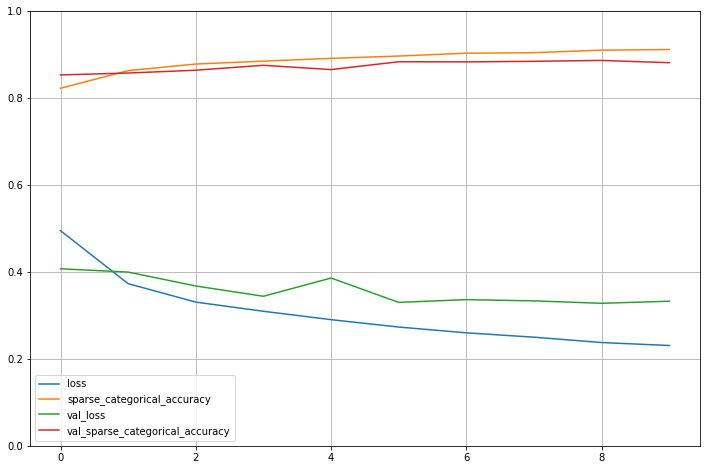

In [22]:
history_df.plot(figsize=(12,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# save the model

In [0]:
model.save('ann_fm.h5')

# evaluate

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3567 - sparse_categorical_accuracy: 0.8781


[0.35671597719192505, 0.8780999779701233]

# load the model

In [0]:
loaded_model = keras.models.load_model('/content/ann_fm.h5')

# predict

In [0]:
X_new = X_test[:3]

In [29]:
pred = loaded_model.predict(X_new)
pred.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.005, 0.   ,
        0.995],
       [0.   , 0.   , 0.997, 0.   , 0.   , 0.   , 0.003, 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [30]:
pred_class = loaded_model.predict_classes(X_new)
pred_class

array([9, 2, 1])